## Myyntiprovision ennustaminen Monte Carlo -menetelmällä

Esimerkki matkittu sivulta [Practical Business Python](https://pbpython.com/monte-carlo.html)

Tässä esimerkissä ennustetaan myyntiprovisioiden kokonaismäärää Monte Carlo -menetelmällä.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Lähtötietoja
avg = 1 # myyntitavoitteen saavuttamisprosentin historiatietoon perustuva keskiarvo
std_dev = .1 # myyntitavoitteen saavuttamisprosentin historiatietoon perustuva keskihajonta
num_reps = 500 # myyjien lukumäärä
num_simulations = 1000 # simulointikierrosten lukumäärä

In [3]:
# Myyntitavoitteen saavuttamisprosenttien simulointi normaalijakaumasta
pct_to_target = np.random.normal(avg, std_dev, size=(num_reps, num_simulations))

In [4]:
# Myyntitavoitteiden simulointi historiatietoon perustuvasta jakaumasta
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, p=sales_target_prob, size=(num_reps, num_simulations))

Provisioprosentti määräytyy myyntitavoitteen saavuttamisen mukaan:
<ul>
<li>0 - 90 % = 2 % (jos myynti 0-90 % tavoitteesta, niin provisio on 2 %)</li>
<li>91 - 99 % = 3 % (jos myynti 91 - 99 % tavoitteesta, niin provisio on 3 %)</li>
<li> >=100 % = 4 % (jos myynti 100 % tai enemmän tavoitteesta, niin provisio on 4 %)</li>
</ul>    
Seuraavassa valitaan provisioprosentti listasta [0.02, 0.03, 0.04] indeksin mukaan. Indeksin arvo saadaan luokittelemalla myyntitavoitteiden saavuttamisprosentit (pct_to_target) luokkarajojen 0.9, 0.99 ja 10 (tähän valittu riittävän iso luku) mukaan.

Kannattaa perehtyä numpy-funktioiden take ja digitize ohjeisiin:

- https://docs.scipy.org/doc/numpy/reference/generated/numpy.take.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.digitize.html
    

In [5]:
commission_percentages = np.take(np.array([0.02, 0.03, 0.04]),
    np.digitize(pct_to_target, bins=[.9, .99, 10]))

In [6]:
# Summataan 500 myyjän provisiot
total_commissions = (commission_percentages * pct_to_target * sales_target).sum(axis=0)

In [7]:
# Tuloksista dataframe
df = pd.DataFrame(data={'Myyntiprovisiot': total_commissions})
df.shape

(1000, 1)

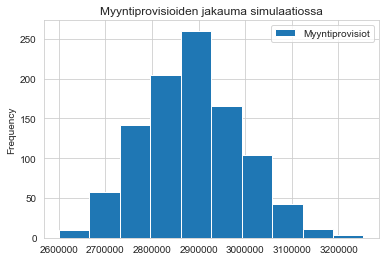

In [8]:
# Provisioiden yhteissumman jakauma simulaatiossa
df.plot(kind='hist', title='Myyntiprovisioiden jakauma simulaatiossa')

In [9]:
# Provisioiden yhteissumman tunnusluvut simulaatiossa
df.describe().style.format('{:.0f}')

,Myyntiprovisiot
count,1000
mean,2885468
std,104065
min,2600309
25%,2815418
50%,2884778
75%,2952184
max,3253528
